# Linear Regression with Scikit Learn
###### https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn?action=embed&cellId=4

## Problem Statement

**QUESTION**: 
>ACME Insurance Inc offers affordable health insurance to thousands of customers all over the US. As the lead data scientist at ACME, **you are tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You are given a csv file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

### Downloading the Data

In [61]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [62]:
from urllib.request import urlretrieve

#urlretrieve(medical_charges_url, "medical.csv")

In [63]:
import pandas as pd

medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer. 

Our objective is to find a way to estimate the value in the **`charges`** column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region. 

Let's check the data type for each column.

In [64]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like **`age`**, **`children`**, **`bmi`** and **`charges`** are numbers. Whereas **`sex`**, **`smoke`** and **`region`** are strings most likely categories. None of the columns contain any missing values so that's awesome.

Here are some statistics of the numerical columns:

In [65]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The range of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning. The **`charges`** column seems to be significantly skewed however, as the median (50th percentile) is much lower than the mean.

**EXERCISE**: What other inferences can be drawn by looking at the table above?
1. The average age of the customers under ACME health insurance is 39 with most being mildly obese and having at least 1 child.
2. Maybe ACME insurance only accepts registrants between the ages of 18 and 64. 18yrs because that's minimum legal age and nothing more than 64yrs because that's too old and chances of them regularly falling ill or dying is much more.
3. 

### Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between **`charges`** and other columns. 

In [66]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts

In [67]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Age

In [68]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (64-18+1), one for each year, and a box plot.

In [69]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box',
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age in the USA.

**EXERCISE**: Can you explain why there are over twice as many customers with ages 18 and 19, compared to other ages?

* Maybe since 18yrs is the minimum legal age in the US, as soon as the youths came of age they probably made use of an offer that ACME probably provided for their age group.


#### Body Mass Index

Let's look at the distribution of BMI of customers using a histogram and boxplot.

In [70]:
medical_df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [71]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of BMI seem to form a Guassian distribution centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted:
* <18.5:    Underweight
* 18.5-24.9: Normal Weight
* 25-29.9:  Overweight
* 30-39.9:  Obesity
* \>40:     Morbid obesity

>**EXERCISE**: Can you explain why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a Gaussian distribution?

For the `ages` column, we saw there is a uniform spread of the population for each age group in the US and thus this was expressed in the uniform distribution. For the `BMI` column, most people in the US tend towards the average BMI which is 30 and as you move higher or lower, the number of people in that category reduces.

#### Charges

Let's visualize the distribution of **`charges`** i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column **`smoker`** to distinguish the charges for smokers and non-smokers.

In [72]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

##### Distribution of Medical Charges in connection with Smoker

In [73]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:
* For most customers, the annual medical charges are under $10,000. Only a small fraction of customers have higher medical expenses, possible due to accidents, major illnesses and genetic diseases. 
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7,300, the median for smokers is close to $35,000.

>**Exercise**: Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

##### Distribution of Medical Charges in Connection with Sex

In [92]:
medical_df.groupby("sex").describe().charges.T

sex,female,male
count,662.000000,676.000000
mean,12569.578844,13956.751178
std,11128.703801,12971.025915
min,1607.510100,1121.873900
25%,4885.158700,4619.134000
50%,9412.962500,9369.615750
75%,14454.691825,18989.590250
max,63770.428010,62592.873090


In [75]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the graph:
* Females generally have similar distribution of medical annual charges as males with their median being similar
* Males on an average have higher charges than females,
* For both males and females, majority of them spend less than 14k annually on medical charges,

##### Distribution of Medical Charges in Connection with Region

In [96]:
medical_df.groupby('region').charges.describe().T

region,northeast,northwest,southeast,southwest
count,324.000000,325.000000,364.000000,325.000000
mean,13406.384516,12417.575374,14735.411438,12346.937377
std,11255.803066,11072.276928,13971.098589,11557.179101
min,1694.796400,1621.340200,1121.873900,1241.565000
25%,5194.322288,4719.736550,4440.886200,4751.070000
50%,10057.652025,8965.795750,9294.131950,8798.593000
75%,16687.364100,14711.743800,19526.286900,13462.520000
max,58571.074480,60021.398970,63770.428010,52590.829390


In [77]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green','grey','orange','magenta'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

#### Smoker

Let's visualize the distribution of the **`smoker`** column using a histogram

In [78]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [79]:
fig = px.histogram(medical_df,
                   x='smoker',
                   color='sex',
                   title='Smoker')
fig.update_layout(bargap=0.1)
fig.show()

It appears that 20% of customers have reported that they smoke. Confirm is this matches the national average, assuming the data was collected in 2010. We can also see that smoking appears to be a more common habit among males. `Verify this`

#### Sex

In [80]:
medical_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [81]:
px.histogram(medical_df, x='sex', color='smoker',title='Sex')

It appears that the data covers a similar number of males and females

#### Region

In [82]:
medical_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [83]:
px.histogram(medical_df,
             x="region",
             color='smoker',
             title='Region')

The data also seems to include data equally distributed amongst the four regions with Southeast having 19 more records.

#### Children

In [84]:
medical_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [85]:
fig = px.pie(medical_df,
             names='children', 
             title='Distribution of Number of Children')
fig.show()

It appears that most people tend to no children or at most 1 child.

#### Ages and Charges

Let's visualize the relationship between **`age`** and **`charges`** using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the **`smoker`** column to color the points.

In [86]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is a significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

* We can see three clusters of points, each which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primarily of presumably 'healthy non-smokers" who have relatively low medical charges compared to others,

     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without medical issues".

     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

#### BMI and Charges

Let's visualize the relationship between BMI and charges using another scatter plot. Once again, we'll use the values from the **`smoker`** column to color the points.

In [87]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges'
                 )
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI  greater than 30.

> **Exercise**: Create some graphs to visualize how the 'charges' column is related to other columns like `children`, `sex`, `region` and `smoker`. Summarize the insights gathered from these graphs. 

#### Children and Charges

In [88]:
fig = px.violin(medical_df,
                x="children",
                y="charges",
                title='No of Children vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Here, we can the distribution of the concentration of charges for the number of children.

From the plot, it seems that as the number of children increase, median cost of medical expenses. But for customers with 5 children, most of them paid 8.5k.

#### Sex and Charges

In [89]:
fig = px.violin(medical_df,'sex','charges',
             title="Sex ")
fig.show()

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in **`charges`** compared to other columns. E.g. **`age`** and **`charges`** seem to grow together, whereas **`bmi`** and **`charges`** don't.

This relationship is often expressed numerically using a measure called the ***correlation coefficient***, which can be computed using the **`.corr`** method of a Pandas series.

In [109]:
# correlation coef between charges and age
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [110]:
# correlation coef between charges and bmi
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [113]:
smoker_values = {'no': 0, 'yes' : 1}

# mapping the `smoker` column to `smoker_values`
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

#### Correlation Matrix

In [114]:
# computing the correlation coefficients between all pairs of numeric columns.
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The result of **`corr`** is called a correlation matrix and it is often visualized using a heatmap.

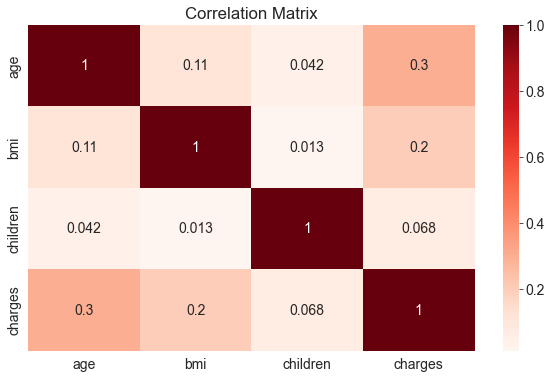

In [131]:
sns.heatmap(medical_df.corr(),
            cmap='Reds',
            annot=True);
plt.title('Correlation Matrix');

### Linear Regression using a Single Feature

We now know that the **`smoker`** and **`age`** columns have the strongest correlation with **`charges`**. Let's try to find a way to estimating the values of **`charges`** using the value of **`age`** for non-smokers. 

First, let's create a dataframe containing just the data for non-smokers

In [120]:
non_smoker_df = medical_df[medical_df.smoker == 'no'] #get only nonsmokers' data

Next, let's visualize the relationship between **`age`** and **`charges`**

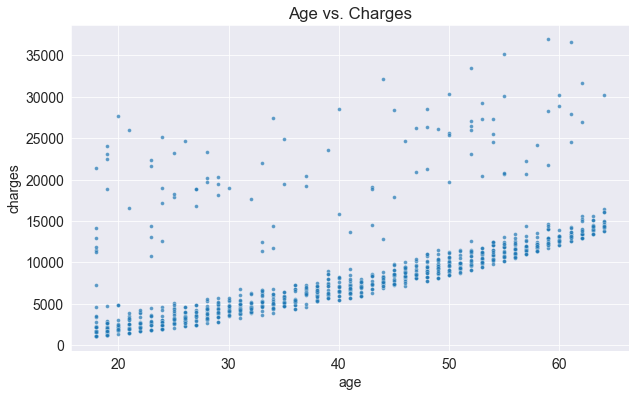

In [130]:
plt.title('Age vs. Charges');
sns.scatterplot(data=non_smoker_df,
                x='age',
                y='charges',
                alpha=0.7, 
                s=15);

#### Suffer Head Method

>Linear Regression Model : $y = wx + b$

Where;
* $y$ = outcome
* $w$ = weight
* $x$ = predictor
* $b$ = bias

Let's define a helper function `estimate_charges`, to compute `charges`, given $age$, $w$ and $b$.

In [159]:
def estimate_charges(age, w, b):
      return w * age + b

Let's guess the values for $w$ and $b$ and use them to estimate the value for `charges`

In [142]:
# guessing the values for w and b
w = 50
b = 100

ages = non_smoker_df.age
estimate_charges = estimate_charges(ages,w,b)

We can plot the estimated charges using a line graph.

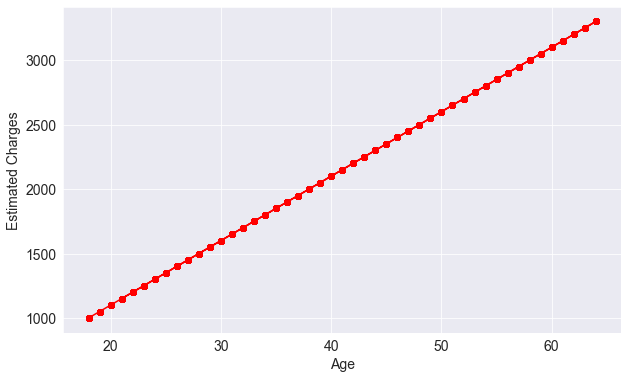

In [143]:
plt.plot(ages, estimate_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so we see how well our *model* fits the data.

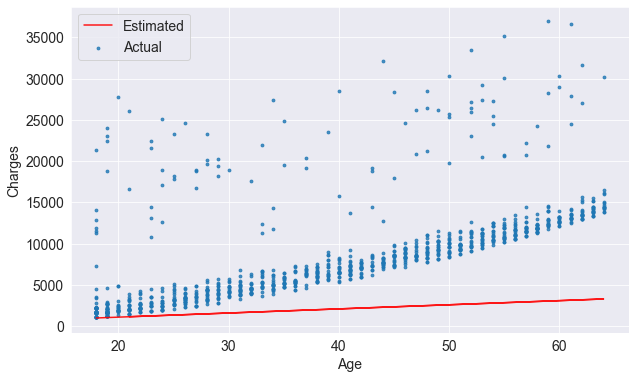

In [145]:
target = non_smoker_df.charges

plt.plot(ages, estimate_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimated', 'Actual']);

Clearly, our estimates are quite poor and the line does not 'fit' the data. However, we can try different values of $w$ and $b$ to move the line around. 

Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [170]:
def try_parameters(w, b):
      ages = non_smoker_df.age
      target = non_smoker_df.charges
      
      estimated_charges = estimate_charges(ages, w, b)
      
      plt.plot(ages, estimated_charges, 'r', alpha=0.9);
      plt.scatter(ages, target, s=8, alpha=0.8);
      plt.xlabel('Age');
      plt.ylabel('Charges');
      plt.legend(['Estimate', 'Actual']);

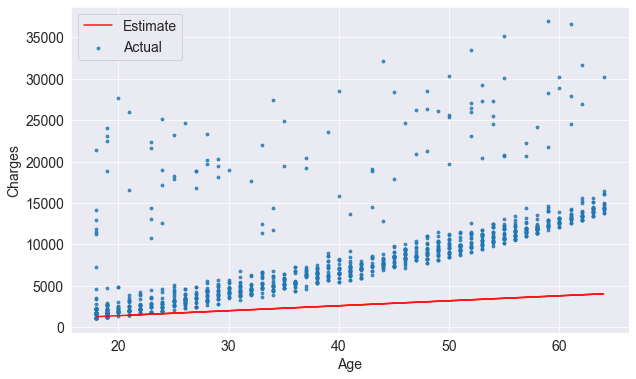

In [171]:
try_parameters(60,200)

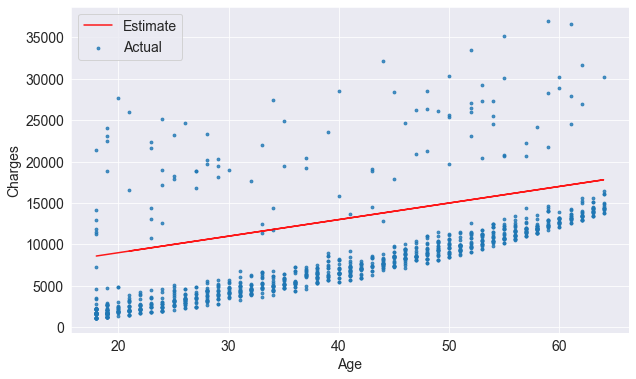

In [203]:
# this is the best I could do
try_parameters(200,5000)

**RMSE** = Root Mean Square Error (Loss/Cost Function)

A method of comparing our model's predictions with the actual targets:

Calculated as:
* Calculate the difference between the targets and predictions (difference == residual)
* Square all elements of the difference matrix to remove negative values
* Calculate the average of the elements in the resulting matrix
* Take the square root of the result


In [204]:
import numpy as np

In [205]:
def rmse(targets, predictions):
      return np.sqrt(np.mean(np.square(targets - predictions)))

Let's compute the RMSE for our model with a sample set of weights

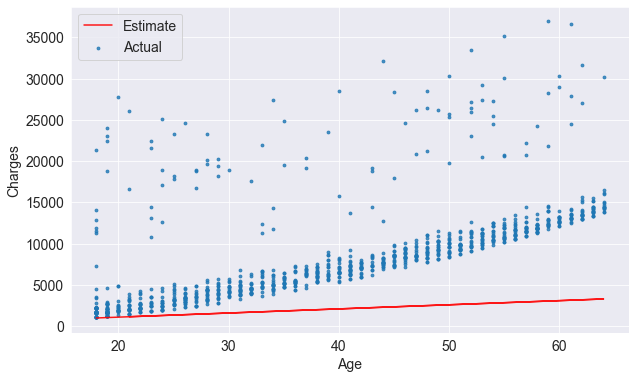

In [206]:
w = 50
b = 100
try_parameters(w, b)

In [209]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

rmse(targets, predicted)

8461.949562575488

Here's how we can interprete the above number: 
>**On average, each element in the prediction differs  from the actual target by $\$8461$**

The result is called the ***loss*** because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: *"the lower the loss, the better the model"*

Let's modify the `try_parameters` function to also display the loss.

In [210]:
def try_parameters(w,b):
      ages = non_smoker_df.age
      target = non_smoker_df.charges
      predictions = estimate_charges(ages, w, b)
      
      plt.plot(ages, predictions, 'r', alpha=0.9);
      plt.scatter(ages, target, s=8, alpha=0.8);
      plt.xlabel('Age');
      plt.ylabel('Charges');
      plt.legend(['Prediction', 'Actual']);
      
      loss = rmse(target, predictions)
      print('RMSE Loss: ', loss)

RMSE Loss:  4778.197917926805


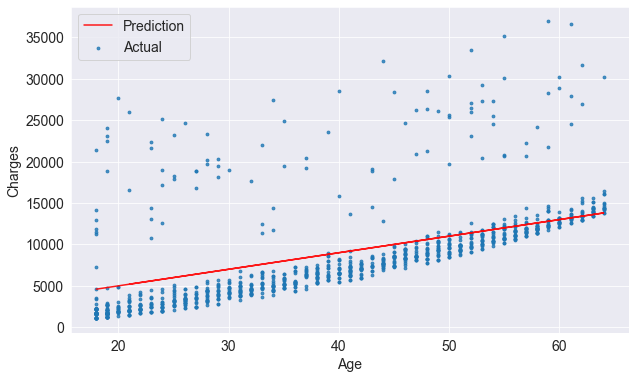

In [249]:
try_parameters(200, 1000)

#### Linear Regression using Scikit-learn
Let's use the **`LinearRegression`** class from **`scikit-learn`** to find the best fit line for "age" vs "charges" using the ordinary least squares optimization technique.

Note: There are two techniques to reduce loss and imporve the fit of the line to the data;
* Ordinary Least Squares: Better for smaller datasets.
* Stochastic Gradient Descent: Better for larger datasets.

In [226]:
from sklearn.linear_model import LinearRegression

First, we create a new model object

In [227]:
model = LinearRegression()

Next, we can use the fit method of the model to find the best fit line for the predictors and outcome

In [228]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



Note that the input **`X`** must be a 2-d array, so we'll need to pass a dataframe, instead of a single column

In [229]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


Let's fit the model to the data

In [230]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61.

In [240]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

Barely comparing these values with that on the scatterplot, we can see that they're a bit reasonable even though the model needs more predictor variables.

Let's compute the predictions for the entire set of inputs.

In [241]:
predictions = model.predict(inputs)

In [242]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the **RMSE** loss to evaluate the model.

In [243]:
rmse(targets, predictions)

4662.505766636391

Seems like our prediction is off by $\$4000$ on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the **`coef_`** and **`intercept_`** properties.

In [244]:
# w
model.coef_

array([267.24891283])

In [245]:
# b
model.intercept_

-2091.4205565650827

Let's visualize the line created above

RMSE Loss:  4662.505766636391


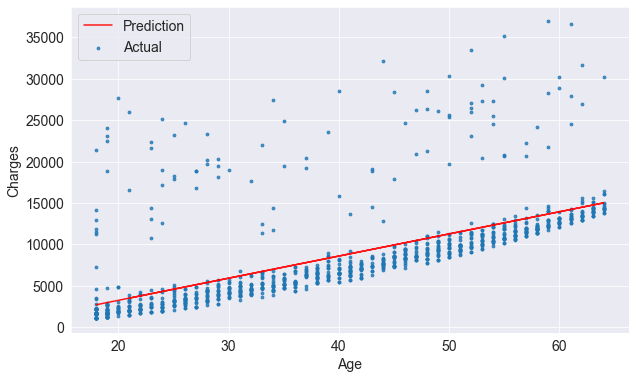

In [250]:
try_parameters(model.coef_, model.intercept_)

>Use the **`SGDRegressor`** class from **`scikit-learn`** to train a model using the stochastic gradient technique. Make predictions and compute the loss. Notice any difference in the result?

In [251]:
from sklearn.linear_model import SGDRegressor

In [252]:
model = SGDRegressor()

In [253]:
predictors = non_smoker_df[['age']]
outcome = non_smoker_df['charges']

In [254]:
model.fit(predictors, outcome)

SGDRegressor()

In [257]:
predictions = model.predict(predictors)
model.coef_, model.intercept_

(array([166.75707102]), array([1169.23697441]))

RMSE Loss:  4922.013287116823


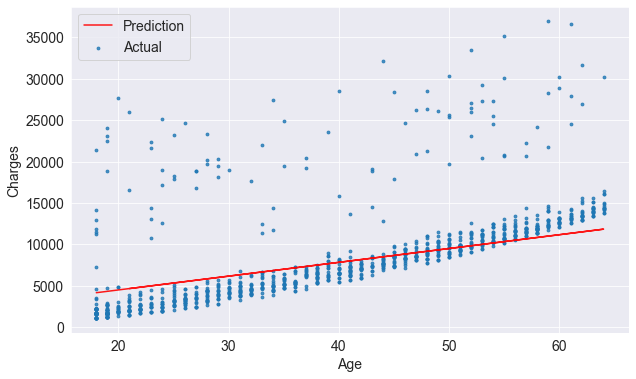

In [258]:
try_parameters(model.coef_, model.intercept_)

SGDRegressor produces a higher RMSE of 4922 than the LinearRegression class

>Exercise: Repeat the steps in this section to train a linear regresssion model to estimate medical charges for smokers. Visualize the targets and predictions and compute the loss


Getting the data for smokers

In [265]:
# Data in question
smoker_df = medical_df[medical_df['smoker']=='yes'] # getting only smokers data

Visualizing the relationship between age and charges for smokers

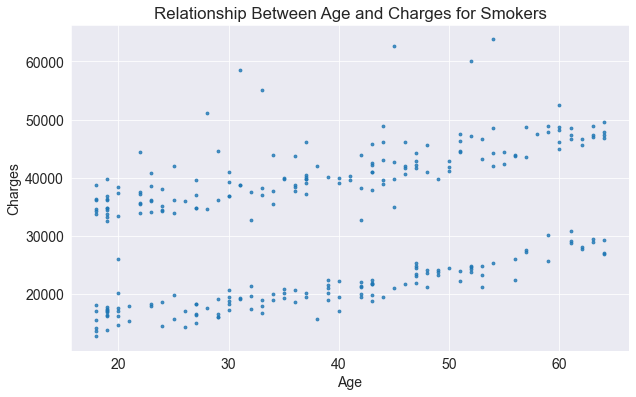

In [269]:
plt.scatter(smoker_df.age, smoker_df.charges, s=8, alpha=0.8);
plt.title("Relationship Between Age and Charges for Smokers");
plt.xlabel('Age');
plt.ylabel('Charges');

Creating model object and defining predictors and outcome

In [272]:
predictors = smoker_df[['age']]
outcome = smoker_df['charges']

model = LinearRegression()

Fitting the model to predictor variable and the target variable

In [275]:
model.fit(predictors, outcome)

LinearRegression()

In [276]:
predictions = model.predict(predictors)

Assessing the model using RMSE

In [291]:
print(f'RMSE: {rmse(outcome, predictions):.3f}')
print(f'Coeff: {model.coef_[0]:.3f} \nIntercept: {model.intercept_:.3f}')

RMSE: 10711.003
Coeff: 305.238 
Intercept: 20294.128


Visualizing the line created by the model

In [293]:
def try_parameters(w,b):
      ages = smoker_df.age
      target = smoker_df.charges
      predictions = estimate_charges(ages, w, b)
      
      plt.plot(ages, predictions, 'r', alpha=0.9);
      plt.scatter(ages, target, s=8, alpha=0.8);
      plt.xlabel('Age');
      plt.ylabel('Charges');
      plt.legend(['Prediction', 'Actual']);
      
      loss = rmse(target, predictions)
      print('RMSE Loss: ', loss)

RMSE Loss:  10711.00334810241


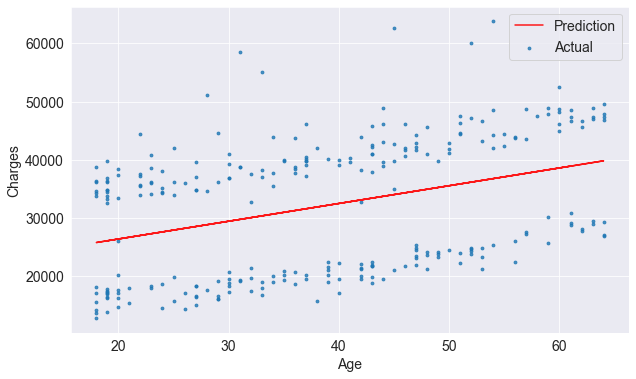

In [294]:
try_parameters(model.coef_, model.intercept_)

#### Machine Learning

Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:
+ **Model**
+ **Cost Function**
+ **Optimizer**

Linear Regression Model using `scikit-learn` in summary

In [295]:
# Create inputs and targets
inputs = non_smoker_df[['age']]
target = non_smoker_df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')

Loss: 4662.505766636391


### Linear Regression using Multiple Features

Using **`age`** and **`bmi`** as our predictor variables and evaluating the model using the loss

>$charges=w_1*age~+~w_2*bmi~+~b$

In [325]:
# Create inputs and targets
inputs = non_smoker_df[['age', 'bmi']]
target = non_smoker_df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')
print(f'Model Coefs: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Loss: 4662.312835461298
Model Coefs: [266.87657817   7.07547666]
Model Intercept: -2293.6320906488672


We can see that `bmi` really doesn't add much to the model. This is due to the very weak correlation it has with `charges`

In [303]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

Let's visualize the relationship to get a clearer picture

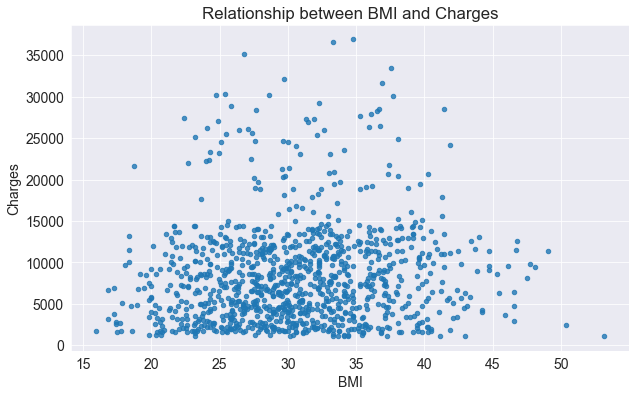

In [313]:
plt.scatter(non_smoker_df.bmi, non_smoker_df.charges,s=20,alpha=0.8);
plt.xlabel('BMI');
plt.ylabel('Charges');
plt.title('Relationship between BMI and Charges');

Clearly, BMI has a much lower weightage and hence a tiny contribution.

This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.

Let's go a step further, and add the final numeric column: **`children`**, which has some form of correlation with **`charges`**

>$charges=w_1*age~+~w_2*bmi~+~w_3*children~+~b$

In [326]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.138928704535422

In [332]:
fig = px.strip(non_smoker_df,
               x='children',
               y='charges',
               title='Children vs. Charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [333]:
# create inputs and targets
inputs = non_smoker_df[['age','bmi','children']]
targets = non_smoker_df['charges']

# create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')
print(f'Model Coefs: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Loss: 4608.470405038245
Model Coefs: [265.2938443    5.27956313 580.65965053]
Model Intercept: -2809.2976032235874


We can see that there was a reduction, even if it isn't much, in the RMSE by $60.

Now, estimating medical charges for all customers using `age`, `bmi` and `children`.

In [337]:
# create inputs and targets
inputs = medical_df[['age','bmi','children']]
targets = medical_df['charges']

# create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')
print(f'Model Coefs: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Loss: 11355.31790112597
Model Coefs: [239.99447429 332.0833645  542.86465225]
Model Intercept: -6916.243347787044


##### Using Categorical Features for Machine Learning

To use categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:
1. If a categorical column has just two categories (***binary category***), then we can replace their values with 0 and 1,
2. If a categorical column has more than 2 categories, we can perform ***one-hot encoding*** i.e. create a new column for each category with 1s and 0s,
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1,2,3,4) preserving the order. These are called ***ordinals***.

##### Binary Categories
The `smoker` category has just two values "yes" and "no". Let's create a new column `smoker_code` containing 0 for "no" and 1 for "yes".

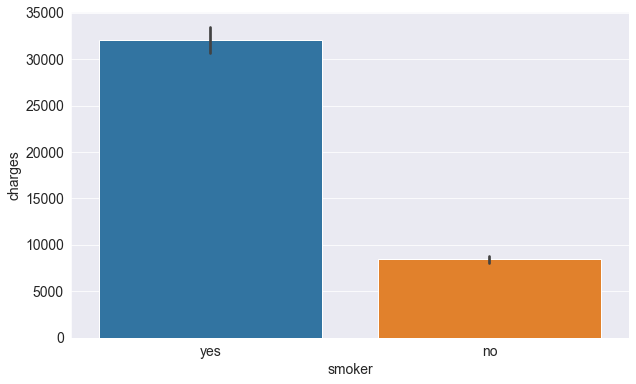

In [346]:
# barplot showing the average charge of a smoker and a nonsmoker
sns.barplot(data=medical_df, x='smoker', y='charges');

In [347]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [348]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

Now using `smoker_code` for the linear regression

In [359]:
# create inputs and targets
inputs = medical_df[['age','bmi','children','smoker_code']]
targets = medical_df['charges']

# create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')
print(f'Model Coefs: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Loss: 6056.439217188078
Model Coefs: [  257.84950728   321.85140247   473.50231561 23811.3998446 ]
Model Intercept: -12102.769362727904


Notice how the loss reduced from `11355` to `6056`, almost by 50%! Remember: Never ignore categorical data.

Try adding the `sex` column as well.

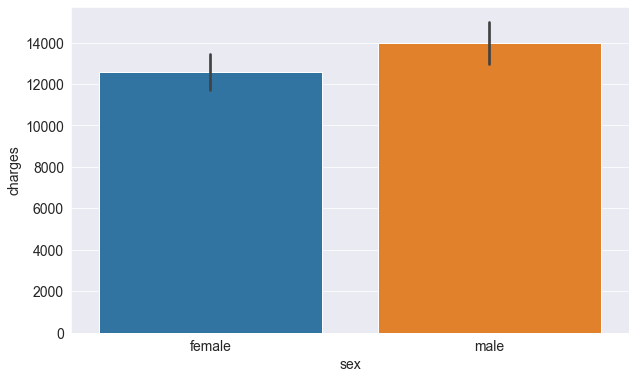

In [356]:
# average charges per gender
sns.barplot(data=medical_df, x='sex', y='charges');

In [357]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_codes'] = medical_df.sex.map(sex_codes)

In [358]:
medical_df.charges.corr(medical_df.sex_codes)

0.057292062202025415

Wow, that's pretty low

In [360]:
# creating inputs and targets
inputs = medical_df[['age','bmi','children','smoker_code','sex_codes']]
targets = medical_df['charges']

# create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')
print(f'Model Coefs: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Loss: 6056.1007087545395
Model Coefs: [  257.73498767   322.36421449   474.41112061 23823.39253065
  -128.63985357]
Model Intercept: -12052.461985664748


As expected, adding **`sex`** column had no significant impact on the loss

##### One-Hot Encoding
The **`region`** column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

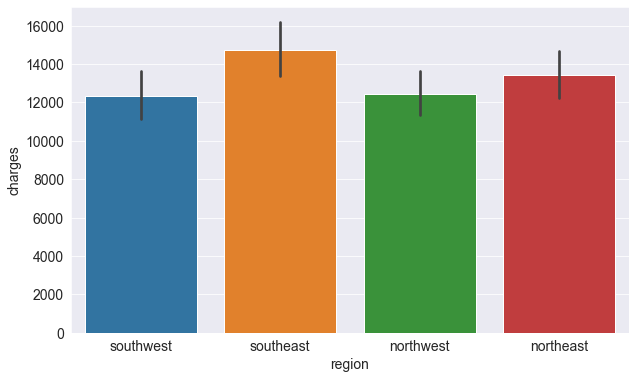

In [361]:
# average charges per region
sns.barplot(data=medical_df,
            x='region',
            y='charges');

In [364]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [365]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [366]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [369]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Now, including the region columns into our linear model
>$charges=w_1*age~+~w_2*bmi~+~w_3*children~+~w_4*smoker~+~w_5*sex~+~w_6*region~+~b$

In [385]:
# create inputs and targets
inputs = medical_df[['age','bmi','children','smoker_code','sex_codes',
                     'northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df['charges']

# create and train model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')
print(f'Model Coefs: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Loss: 6041.679651174455
Model Coefs: [  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
Model Intercept: -12525.547811195454


Once again, this leads to a fairly small reduction in the loss.

>**Exercise:** Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? Why or why not? Try it out and see if you can justify you answer with data.

In [375]:
# splitting the main df into 2 based on smoker column
non_smoker_df = medical_df[medical_df.smoker == 'no']
smoker_df = medical_df[medical_df.smoker != 'no']

In [379]:
# deleting the redundant `smoker_code` column
del non_smoker_df['smoker_code']
del smoker_df['smoker_code']

Linear Regression Model for Smokers


In [384]:
# creating inputs and targets
inputs = smoker_df[['age','bmi','children','sex_codes','northeast', 
                    'northwest', 'southeast', 'southwest']]
targets = smoker_df['charges']

# create and train model
smoker_lm = LinearRegression()
smoker_lm.fit(inputs, targets)

# generate predictions
predictions = smoker_lm.predict(inputs)

# compute loss to evaluate model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')
print(f'Model Coefs: {smoker_lm.coef_}')
print(f'Model Intercept: {smoker_lm.intercept_}')

Loss: 5668.467882112154
Model Coefs: [  267.40438625  1475.54562981   182.73655059  -388.1216487
   754.5850207     64.86699592 -1138.15349664   318.70148002]
Model Intercept: -23426.35433875903


Linear Regression Model for Non-Smokers

In [383]:
# creating inputs and targets
inputs = non_smoker_df[['age','bmi','children','sex_codes','northeast', 
                        'northwest', 'southeast', 'southwest']]
targets = non_smoker_df['charges']

# create and train model
nonsmoker_lm = LinearRegression()
nonsmoker_lm.fit(inputs, targets)

# generate predictions
predictions = nonsmoker_lm.predict(inputs)

# compute loss to evaluate model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')
print(f'Model Coefs: {nonsmoker_lm.coef_}')
print(f'Model Intercept: {nonsmoker_lm.intercept_}')

Loss: 4573.074988795491
Model Coefs: [ 264.48143811   18.98046182  587.45825749 -525.97048681  733.68301887
  185.554256   -258.36537156 -660.87190331]
Model Intercept: -2940.7471545563003


>**Observation:** Both separate models for smokers and non-smokers perform better than the combined model

### Model Improvements

#### Feature Scaling
Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions of our model.

$charges=w_1*age~+~w_2*bmi~+~w_3*children~+~w_4*smoker~+~w_5*sex~+~w_6*region~+~b$

To compare the importance of each feature in the model, our first instinct might be to compare the weights.

In [388]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [389]:
model.intercept_

-12525.547811195454

In [418]:
input_cols = ['age','bmi','children','smoker_code','sex_codes',
              'northeast', 'northwest', 'southeast', 'southwest']
correl = medical_df.corr().charges.drop('charges')

weightsDict = {'feature': np.append(input_cols, 'Intercept'),
               'weight': np.append(model.coef_, model.intercept_),
               'correlations': np.append(correl, np.NaN)}
weights_df = pd.DataFrame(weightsDict)
weights_df

,feature,weight,correlations
0,age,256.856353,0.299008
1,bmi,339.193454,0.198341
2,children,475.500545,0.067998
3,smoker_code,23848.534542,0.787251
4,sex_codes,-131.314359,0.057292
5,northeast,587.009235,0.006349
6,northwest,234.045336,-0.039905
7,southeast,-448.012814,0.073982
8,southwest,-373.041756,-0.043210
9,Intercept,-12525.547811,NaN


While it seems like **`bmi`** and **`northeast`** have a higher weight than **`age`**, keep in mind that the range of values for **`bmi`** is limited (15-40) and the **`northeast`** column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:
1. We can't compare the weights of different columns to identify which features are important.
2. A column with a large range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or **STANDARDIZE**) the values in numeric column by subtracting the mean and dividing by the standard deviation.

> $Standardization~=~\frac{x~-~\mu}{\sigma}$

We can apply scaling using the `StandardScaler` class from `scikit-learn`

In [419]:
from sklearn.preprocessing import StandardScaler

In [420]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [421]:
# get columns that need scaling
numeric_cols = ['age','bmi','children']

# fit model
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [422]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [423]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [424]:
# now scale the data
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [425]:
scaled_df = medical_df.copy()

In [426]:
scaled_df[numeric_cols] = scaled_inputs

In [428]:
# train a model based on the scaled data
## create inputs and targets
input_cols = ['age','bmi','children','smoker_code','sex_codes',
              'northeast', 'northwest', 'southeast', 'southwest']
inputs = scaled_df[input_cols]
targets = scaled_df['charges']

## create and train model
model = LinearRegression()
model.fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate model
loss = rmse(targets, predictions)
print(f'Loss: {loss}')
print(f'Model Coefs: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Loss: 6041.679651174455
Model Coefs: [ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
Model Intercept: 8466.483215411827


Notice that the Loss remained the same while the model's coefficients and intercept changed.

In [432]:
correl = scaled_df.corr().charges.drop('charges')

weightsDict = {'feature': np.append(input_cols, 'Intercept'),
               'weight': np.append(model.coef_, model.intercept_),
               'correlations': np.append(correl, np.NaN)}
weights_df = pd.DataFrame(weightsDict)
weights_df.sort_values('weight', ascending=False)

,feature,weight,correlations
3,smoker_code,23848.534542,0.787251
9,Intercept,8466.483215,NaN
0,age,3607.472736,0.299008
1,bmi,2067.691966,0.198341
5,northeast,587.009235,0.006349
2,children,572.998210,0.067998
6,northwest,234.045336,-0.039905
4,sex_codes,-131.314359,0.057292
8,southwest,-373.041756,-0.043210
7,southeast,-448.012814,0.073982


We can now clearly see that the most important features are:
1. Smoker
2. Age
3. BMI

#### Creating a Test Set
Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [433]:
from sklearn.model_selection import train_test_split

In [437]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [438]:
# create and train the model
model = LinearRegression()
model.fit(inputs_train, targets_train)

# generate predictions
predictions_train = model.predict(inputs_train)

# compute loss to evaluate the model
loss = rmse(targets_train, predictions_train)
print('Train Loss: ', loss)

Train Loss:  6105.8828109971255


Now, apply the model on the test data

In [439]:
# generate predictions
predictions_test = model.predict(inputs_test)

# compute loss to evaluate the model
loss = rmse(targets_test, predictions_test)
print('Test Loss: ', loss)

Test Loss:  5458.186533916587


### How to Approach a Machine Learning Problem
Here's a strategy you can apply to approach any ML problem
1. **Explore** the data and find **correlations** between inputs and targets,
2. Pick the **right model**, **loss functions** and **optimizer** for the problem at hand,
3. **Scale** numeric variables and **one-hot encode** categorical data,
4. Set aside a **test set** (using a fraction of the training set),
5. **Train** the model,
6. Make **predictions** on the test set and **compute the loss**.

### Revision Questions

1.	Why do we have to perform EDA before fitting a model to the data?
2.	What is a parameter?
3.	What is correlation?
4.	What does negative correlation mean?
5.	How can you find correlation between variables in Python?
6.	What is causation? Explain difference between correlation and causation with an example.
7.	Define Linear Regression.
8.	What is univariate linear regression?
9.	What is multivariate linear regression?
10.	What are weights and bias?
11.	What are inputs and targets?
12.	What is loss/cost function?
13.	What is residual? 
14.	What is RMSE value? When and why do we use it?
15.	What is an Optimizer? What are different types of optimizers? Explain each with an example.
16.	What library is available in Python to perform Linear Regression?
17.	What is `sklearn.linear_model`?
18.	What does `model.fit()` do? What arguments must be given?
19.	What does `model.predict()` do? What arguments must be given?
20.	How do we calculate RMSE values?
21.	What is `model.coef_`?
22.	What is `model.intercept_`?
23.	What is SGDRegressor? How is it different from Linear Regression?
24.	Define Machine Learning. What are the main components in Machine Learning?
25.	How does loss value help in determining whether the model is good or not?
26.	What are continuous and categorical variables?
27.	How do we handle categorical variables in Machine Learning? What are the common techniques?
28.	What is feature scaling? How does it help in Machine Learning?
29.	How do we perform scaling in Python?
30.	What is `sklearn.preprocessing`?
31.	What is a Test set?
32.	How do we split data for model fitting (training and testing) in Python?
33.	How do you approach a Machine Learning problem?